In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from trieste.observer import INEQUALITY_CONSTRAINT_PREFIX, OBJECTIVE

OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"

In [2]:
def process_ts_ackley_results(result_dir: str,
                           num_runs: int,
                           failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        assert (safe_obs_values.shape == failure_mask.shape)
        safe_obs_values[failure_mask] = failure_val
        safe_obs_values = safe_obs_values * 10.0
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Ackley10

In [3]:
tr_res, tr_mean, tr_median, tr_std = process_ts_ackley_results("final_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
tr_matern_res, tr_matern_mean, tr_matern_median, tr_matern_std = process_ts_ackley_results("final_scbo_results/ackley_10/matern/data/", num_runs=30, failure_val=1.0)

2023-09-18 08:54:32.114623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
with open("final_scbo_results/ackley_10/trust_region/data/run_0_data.pkl", "rb") as fp:
    run0 = pickle.load(fp)

In [14]:
with open("final_scbo_results/ackley_10/trust_region/data/run_1_data.pkl", "rb") as fp:
    run1 = pickle.load(fp)

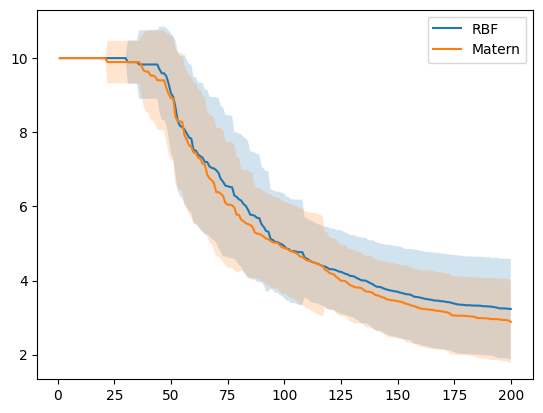

In [12]:
iters = [i for i in range(1, 201)]
plt.plot(iters, tr_mean, label="RBF")
plt.plot(iters, tr_matern_mean, label="Matern")
plt.fill_between(iters, tr_mean - tr_std, tr_mean + tr_std, alpha=0.2)
plt.fill_between(iters, tr_matern_mean - tr_matern_std, tr_matern_mean + tr_matern_std, alpha=0.2)
plt.legend()

In [10]:
iter = 200
print(f"RBF: 5%: {np.percentile(tr_res, 5, axis=0)[iter-1]}, Median: {np.percentile(tr_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(tr_res, 95, axis=0)[iter-1]}")
print(f"Matern: 5%: {np.percentile(tr_matern_res, 5, axis=0)[iter-1]}, Median: {np.percentile(tr_matern_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(tr_matern_res, 95, axis=0)[iter-1]}")

RBF: 5%: 0.7401723926126678, Median: 3.2908303516280544, 95%: 5.220323420786391
Matern: 5%: 1.1961636568236553, Median: 2.8014208950374435, 95%: 4.72222230633814


In [46]:
tr_res, tr_mean, tr_median, tr_std = process_ts_ackley_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=24, failure_val=1.0)
vanilla_res, vanilla_mean, vanilla_median, vanilla_std = process_ts_ackley_results("final_ts_al_results/ackley_10/vanilla/data/", num_runs=24, failure_val=1.0)
scbo_res, scbo_mean, scbo_median, scbo_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_res, scbo_vanilla_mean, scbo_vanilla_median, scbo_vanilla_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_random_res, scbo_vanilla_random_mean, scbo_vanilla_random_median, scbo_vanilla_random_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla_random/data/", num_runs=10, failure_val=1.0)
bilog_res, bilog_mean, bilog_median, bilog_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region_bilog/data/", num_runs=30, failure_val=1.0)

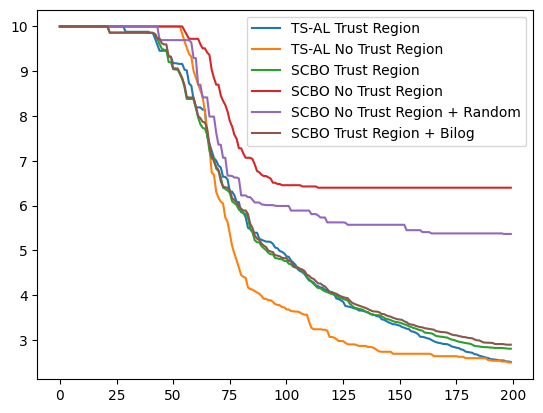

In [47]:
plt.plot(tr_mean, label="TS-AL Trust Region")
plt.plot(vanilla_mean, label="TS-AL No Trust Region")
plt.plot(scbo_mean, label="SCBO Trust Region")
plt.plot(scbo_vanilla_mean, label="SCBO No Trust Region")
plt.plot(scbo_vanilla_random_mean, label="SCBO No Trust Region + Random")
plt.plot(bilog_mean, label="SCBO Trust Region + Bilog")
plt.legend()

In [52]:
def process_lockwood_results(result_dir: str,
                       num_runs: int,
                       failure_val: float):
    all_results = []
    for run in range(10, 10 + num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals * 10000
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [41]:
lockwood_tr_res, lockwood_tr_mean, lockwood_tr_median, lockwood_tr_std = process_lockwood_results("final_ts_al_results/lockwood/trust_region/data/", num_runs=11, failure_val=60000.0)
lockwood_vanilla_res, lockwood_vanilla_mean, lockwood_vanilla_median, lockwood_vanilla_std = process_lockwood_results("final_ts_al_results/lockwood/vanilla_adam/data/", num_runs=22, failure_val=60000.0)

In [11]:
bfgs_res, bfgs_mean, bfgs_median, bfgs_std = process_lockwood_results("final_ts_al_results/lockwood/l-bfgs-b/data/", num_runs=21, failure_val=60000.0)

In [53]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_lockwood_results("experimental_scbo_results/lockwood/trust_region/data/", num_runs=15, failure_val=60000.0)

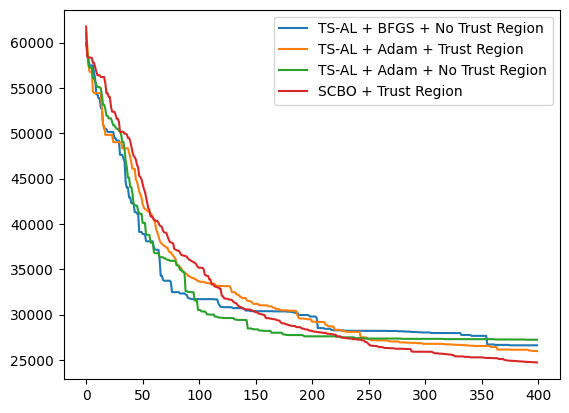

In [54]:
plt.plot(bfgs_mean, label="TS-AL + BFGS + No Trust Region")
plt.plot(lockwood_tr_mean, label="TS-AL + Adam + Trust Region")
plt.plot(lockwood_vanilla_mean, label="TS-AL + Adam + No Trust Region")
plt.plot(scbo_mean, label="SCBO + Trust Region")
plt.legend()
plt.show()

In [25]:
key_iterations = [100, 250, 400]

In [43]:
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(bfgs_res, 5, axis=0)[iter-1]}, Median: {np.percentile(bfgs_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(bfgs_res, 95, axis=0)[iter-1]}")

Iter: 100
5%: 25922.19, Median: 30074.24, 95%: 47265.62
Iter: 250
5%: 25166.2, Median: 27672.57, 95%: 30014.26
Iter: 400
5%: 24497.18, Median: 26882.16, 95%: 28519.0


In [55]:
print("SCBO + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_res, 95, axis=0)[iter-1]}")

SCBO + Trust Region
Iter: 100
5%: 27243.987, Median: 33615.45, 95%: 46825.34299999999
Iter: 250
5%: 24051.797000000002, Median: 26131.000000000004, 95%: 31004.293
Iter: 400
5%: 23252.013000000003, Median: 24411.81, 95%: 26922.423


In [44]:
print(f"TS-AL + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_tr_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_tr_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_tr_res, 95, axis=0)[iter-1]}")

TS-AL + Trust Region
Iter: 100
5%: 25607.575, Median: 32526.929999999997, 95%: 44303.475
Iter: 250
5%: 24155.115, Median: 27129.31, 95%: 30915.21
Iter: 400
5%: 23533.309999999998, Median: 25657.54, 95%: 30190.57


In [45]:
print("TS-AL + No Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_vanilla_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_vanilla_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_vanilla_res, 95, axis=0)[iter-1]}")

TS-AL + No Trust Region
Iter: 100
5%: 26518.120499999997, Median: 29537.3, 95%: 34296.768
Iter: 250
5%: 25844.023999999998, Median: 27452.190000000002, 95%: 28570.438
Iter: 400
5%: 25844.023999999998, Median: 27376.0, 95%: 28557.32


In [65]:
def process_results(result_dir: str,
                    num_runs: int,
                    failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        satisfied_mask = np.full(shape=run_data[OBJECTIVE].observations.shape[0], fill_value=True)
        for key in run_data.keys():
            if key.startswith(INEQUALITY_CONSTRAINT_PREFIX):
                inequality_constraint_satisfied = run_data[key].observations.numpy().squeeze() <= 0
                satisfied_mask = np.logical_and(satisfied_mask, inequality_constraint_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Final Ackley10

In [209]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_results("final_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
ts_al_res, ts_al_mean, ts_al_median, ts_al_std = process_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)

In [270]:
updated_scbo_res, updated_scbo_mean, updated_scbo_median, updated_scbo_std = process_results("final_scbo_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
updated_ts_al_res, updated_ts_al_mean, updated_ts_al_median, updated_ts_al_std = process_results("final_ts_al_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)

In [271]:
updated_ts_al_res[:,-1]

array([0.1638166420516221 , 0.4884955725902195 , 0.17786846384220958,
       0.07185931296108591, 0.316494360294854  , 0.23876830585184655,
       0.46553688827969675, 0.4863143357735041 , 0.17496990200667675,
       0.2083210350765178 , 0.06591591686988992, 0.13967806206764308,
       0.32669877126815694, 0.305439474699325  , 0.2535174502213827 ,
       0.12812562290736196, 0.05336155500990145, 0.3043688195517486 ,
       0.4373580237543063 , 0.2561291629017369 , 0.3790132361830807 ,
       0.4698724907250892 , 0.16011644609693398, 0.27239758097647987,
       0.1830001308641293 , 0.26856480584062437, 0.24436046921644347,
       0.25085167526936447, 0.18256090906168296, 0.16692546078500498])

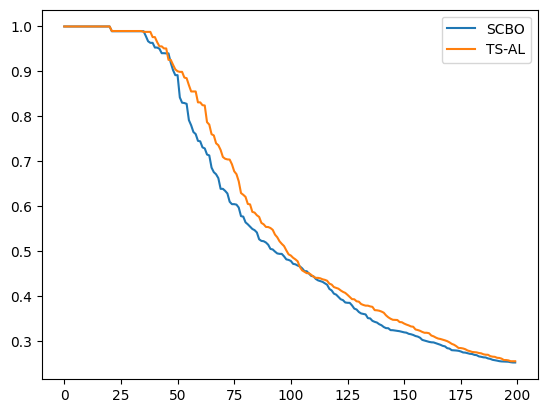

In [272]:
plt.plot(updated_scbo_mean, label="SCBO")
plt.plot(updated_ts_al_mean, label="TS-AL")
plt.legend()

In [171]:
exp_ts_al_res, exp_ts_al_mean, exp_ts_al_median, exp_ts_al_std = process_results("experimental_ts_al_results/ackley_10/trust_region/data/", num_runs=24, failure_val=1.0)

In [176]:
exp_ts_al_res[0][82]

0.608565948554908

In [114]:
np.mean(scbo_res[:, -1])

0.32329865134820973

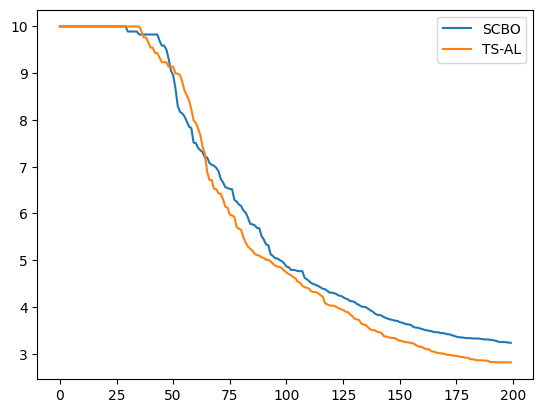

In [215]:
plt.plot(scbo_mean*10, label="SCBO")
plt.plot(ts_al_mean*10, label="TS-AL")
plt.legend()

In [118]:
key_iterations = [50, 150, 200]

In [265]:
print("SCBO")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"Original - 5%: {np.percentile(scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_res, 95, axis=0)[iter-1]}")
    print(f"Updated - 5%: {np.percentile(updated_scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(updated_scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(updated_scbo_res, 95, axis=0)[iter-1]}")

SCBO
Iter: 50
Original - 5%: 0.6072741210409403, Median: 1.0, 95%: 1.0
Updated - 5%: 0.5842433329213552, Median: 1.0, 95%: 1.0
Iter: 150
Original - 5%: 0.1827046813602281, Median: 0.37417481539496633, 95%: 0.5638900921647412
Updated - 5%: 0.18735667703010045, Median: 0.29751107718223757, 95%: 0.5206060031660483
Iter: 200
Original - 5%: 0.07401723926126678, Median: 0.32908303516280546, 95%: 0.5220323420786391
Updated - 5%: 0.10624174678224717, Median: 0.2215358109406214, 95%: 0.4843613128835706


In [266]:
print("TS-AL")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"Original - 5%: {np.percentile(ts_al_res, 5, axis=0)[iter-1]}, Median: {np.percentile(ts_al_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(ts_al_res, 95, axis=0)[iter-1]}")
    print(f"Updated - 5%: {np.percentile(updated_ts_al_res, 5, axis=0)[iter-1]}, Median: {np.percentile(updated_ts_al_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(updated_ts_al_res, 95, axis=0)[iter-1]}")

TS-AL
Iter: 50
Original - 5%: 0.5818156608190933, Median: 1.0, 95%: 1.0
Updated - 5%: 0.5812541702579478, Median: 1.0, 95%: 1.0
Iter: 150
Original - 5%: 0.14659729580097816, Median: 0.34277981673342617, 95%: 0.4668550072458511
Updated - 5%: 0.12213913638128318, Median: 0.3589902355630553, 95%: 0.5206241358161408
Iter: 200
Original - 5%: 0.13161307318281665, Median: 0.27978475641367667, 95%: 0.4354929255236629
Updated - 5%: 0.06769893569724872, Median: 0.2535174502213827, 95%: 0.4813817822589796


In [108]:
ts_al_median[-1]

0.27978475641367667

In [109]:
scbo_median[-1]

0.32908303516280546

In [76]:
tr_res, tr_mean, tr_median, tr_std = process_results("final_scbo_results/lunar_10/trust_region/data/", num_runs=30, failure_val=-2.0)

In [239]:
updated_tr_res, updated_tr_mean, updated_tr_median, updated_tr_std = process_results("final_scbo_results/lunar_10/trust_region_default_noise/data/", num_runs=30, failure_val=-2.0)

In [240]:
np.argmin(tr_res[0])

652

In [241]:
updated_tr_res[:, -1]

array([-2.                , -2.7556294593741244, -2.5379258664844846,
       -2.808632225680495 , -2.814249979082563 , -2.795016705971956 ,
       -2.7972567117221963, -2.7684805652331717, -2.                ,
       -2.816823309435717 , -2.7456207630282234, -2.76401305778388  ,
       -2.8031199273969007, -2.7530381562129222, -2.813823733654495 ,
       -2.8053583849947907, -2.                , -2.808422032108825 ,
       -2.8323825367928537, -2.7878027650681205, -2.                ,
       -2.8090635636449575, -2.                , -2.7976539489296974,
       -2.                , -2.8393087503777474, -2.                ,
       -2.7588222164335887, -2.797003948402933 , -2.                ])

In [95]:
tr_res[:, -1]

array([-2.816238927743087 , -2.                , -2.                ,
       -2.8102084298169276, -2.                , -2.8003130041237183,
       -2.                , -2.                , -2.                ,
       -2.7977907070528865, -2.7826497310079987, -2.848070482807988 ,
       -2.                , -2.                , -2.797306928234579 ,
       -2.                , -2.                , -2.827941513122439 ,
       -2.808764112464606 , -2.734327041468467 , -2.                ,
       -2.                , -2.756520258299985 , -2.818340970908141 ,
       -2.                , -2.806538569052564 , -2.                ,
       -2.806585176464632 , -2.786227593492641 , -2.817005727084273 ])

In [140]:
import functions.lunar_lander as lunar_lander
import gymnasium as gym
import tensorflow as tf

In [225]:
prms = np.linspace(0, 1, 200)
env = gym.make("LunarLander-v2")
configs = [[0.39, 0.46, i, 0.57609276, 0.97080618, 0.82664113, 0.30932992, 0.62469106, 0.03787777, 0.00543859, 0.10672688, 0.10077708] for i in prms]  
configs = tf.constant(configs, dtype=tf.float64) 
# a = tf.constant([[0.39, 0.46, 0.28166544, 0.57609276, 0.97080618, 0.82664113,
#                     0.30932992, 0.62469106, 0.03787777, 0.00543859, 0.10672688, 0.10077708]], dtype=tf.float64)
res = lunar_lander.lunar_lander_observer(10, env, configs)

Mean Rewards: [[ 0.9012436516340667 ]
 [ 0.5110691040186318 ]
 [ 0.12517641860142606]
 [-1.0667367025893746 ]
 [-0.7856079094269766 ]
 [-1.5145237534414726 ]
 [-1.831188447614523  ]
 [-2.0638193506067135 ]
 [-2.4860760320814324 ]
 [-2.2901651341546856 ]
 [-1.8941055008393388 ]
 [-2.156160175604883  ]
 [-2.220462581323099  ]
 [-2.6846802460921153 ]
 [-2.4718185986945187 ]
 [-2.4603379619919705 ]
 [-1.8246677197176961 ]
 [-2.250251669913708  ]
 [-2.2578670914649313 ]
 [-2.04851900591735   ]
 [-2.056475393138875  ]
 [-2.4997364900738255 ]
 [-2.504056424389749  ]
 [-2.734555784290371  ]
 [-2.736458334577567  ]
 [-2.73775271402357   ]
 [-2.7419771011301366 ]
 [-2.7337503644906853 ]
 [-2.7236084072484292 ]
 [-2.485235285300022  ]
 [-2.500143179246306  ]
 [-2.7312529809679518 ]
 [-2.498952447161855  ]
 [-2.737766456250163  ]
 [-2.506130913188328  ]
 [-2.50159873370956   ]
 [-2.500930763067726  ]
 [-2.501321772498476  ]
 [-2.5010639642570895 ]
 [-2.504440527744276  ]
 [-2.503036510600023  ]
 [

In [226]:
for i in range(10):
    print(f"Constraint {i} : {res[f'INEQUALITY_CONSTRAINT_{i}'].observations[-1]}")

Constraint 0 : [-0.6999073985308086]
Constraint 1 : [-0.725786161279596]
Constraint 2 : [1.537785796080188]
Constraint 3 : [-0.6370399476066712]
Constraint 4 : [1.4157400796464716]
Constraint 5 : [-0.6200677431052373]
Constraint 6 : [-0.43978750395536054]
Constraint 7 : [-0.6018124174437861]
Constraint 8 : [-0.8291306903986515]
Constraint 9 : [-0.9551217220437184]


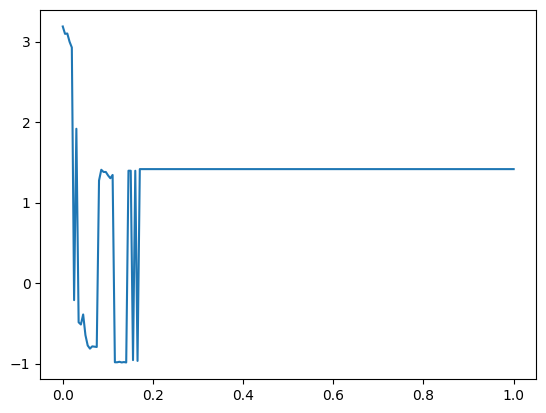

In [257]:
plt.plot(prms, res['INEQUALITY_CONSTRAINT_4'].observations.numpy().squeeze())

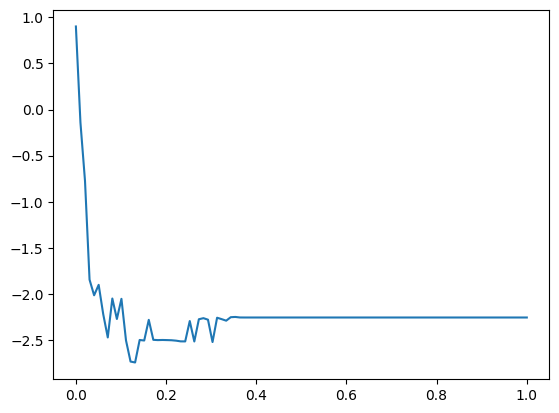

In [147]:
plt.plot(prms, res['OBJECTIVE'].observations.numpy().squeeze())

In [138]:
configs[5]

[0.39,
 0.46,
 0.05050505050505051,
 0.57609276,
 0.97080618,
 0.82664113,
 0.30932992,
 0.62469106,
 0.03787777,
 0.00543859,
 0.10672688,
 0.10077708]

In [82]:
with open("final_scbo_results/lunar_10/trust_region/data/run_0_data.pkl", "rb") as fp:
    run0 = pickle.load(fp)

In [91]:
np.set_printoptions(precision=30)

In [90]:
run0['OBJECTIVE'].query_points[652]

<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([0.32695865797088686 , 0.4958486355055563  , 0.7429634638193503  ,
       0.04857285086196522 , 0.8026090774915459  , 0.8346606449434633  ,
       0.07245907623457963 , 0.20608640335368336 , 0.009721362543119786,
       0.6160125202068396  , 0.06812324413157762 , 0.036041216827150266])>

In [94]:
tr_res[0]

array([-2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.          

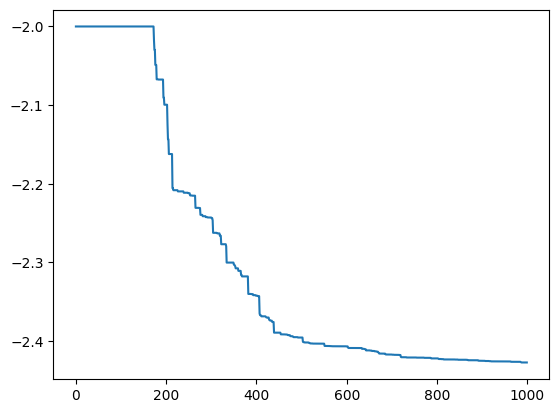

In [78]:
plt.plot(tr_mean)